In [3]:
# Menghubungkan Google Colab ke Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
file_path= '/content/drive/MyDrive/ML3/praktikum/TUGAS PRAKTIKUM/tugas praktikum 3/Data/day.csv'
df = pd.read_csv(file_path)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


=== HASIL MODEL PREDIKSI ===
RMSE: 1356.79
R² Score: 0.5409
Akurasi: 54.09%

=== PENGARUH VARIABLE ===
temp: 5564.45
season: 421.35
weathersit: -470.91
hum: -2231.35
windspeed: -2717.20


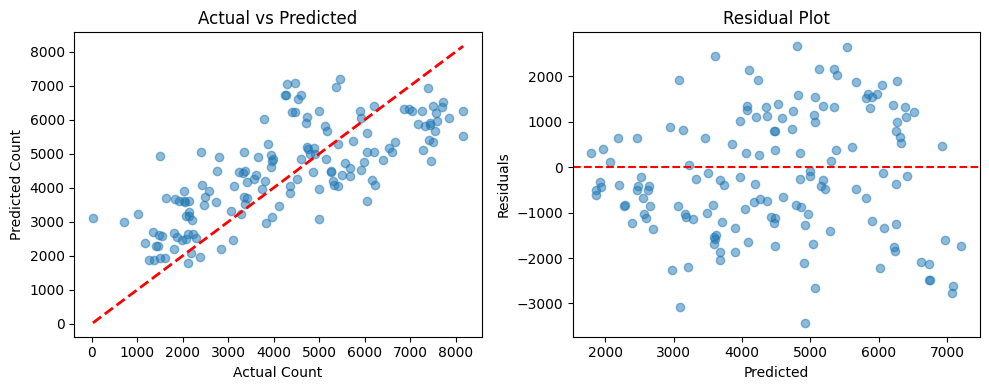


=== CONTOH PREDIKSI ===
Data testing pertama:
temp          0.475833
season        4.000000
weathersit    1.000000
hum           0.733750
windspeed     0.174129
Name: 703, dtype: float64
Actual count: 6606
Predicted count: 5063


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# X: variabel independent, y: variabel dependent (target)
X = df[['temp', 'season', 'weathersit', 'hum', 'windspeed']]
y = df['cnt']

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("=== HASIL MODEL PREDIKSI ===")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Akurasi: {r2*100:.2f}%")

# Tampilkan koefisien untuk setiap variabel
print("\n=== PENGARUH VARIABLE ===")
for i, col in enumerate(X.columns):
    print(f"{col}: {model.coef_[i]:.2f}")

# Visualisasi sederhana
plt.figure(figsize=(10, 4))

# Plot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Actual vs Predicted')

# Plot 2: Residuals
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

# Prediksi contoh
print("\n=== CONTOH PREDIKSI ===")
print("Data testing pertama:")
print(X_test.iloc[0])
print(f"Actual count: {y_test.iloc[0]}")
print(f"Predicted count: {y_pred[0]:.0f}")